# Self-Supervision Examples (Vision)

## Imports and Helpers

In [1]:
import os

from PIL import Image
import matplotlib.pyplot as plt

import torch

import torchvision.transforms as transforms

from collators import RotationCollator, CountingCollator, ContextCollator, JigsawCollator

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

def tensor2PIL(torch_img):
    return transforms.ToPILImage()(torch_img.squeeze(0))

## Test Image

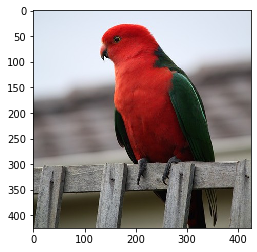

In [3]:
img = Image.open(os.path.join('..', 'assets', 'parrot.jpg')).convert('RGB')
plt.imshow(img)
plt.show()

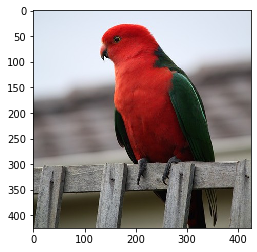

In [4]:
torch_img = transform(img).unsqueeze(0)
plt.imshow(tensor2PIL(torch_img))
plt.show()

## Rotation Classification

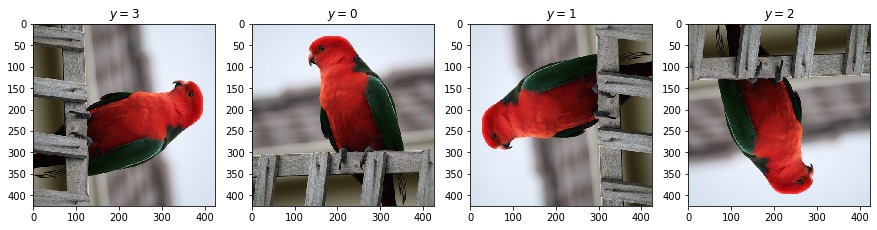

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(15, 12))

collator = RotationCollator(num_rotations=4, rotation_procedure='all')
x, y = collator([[torch_img.squeeze(0), -1]])

for i in range(x.shape[0]):
    ax[i].set_title(r'$y=%d$' % y[i])
    ax[i].imshow(tensor2PIL(x[i]))

plt.show()

## Counting

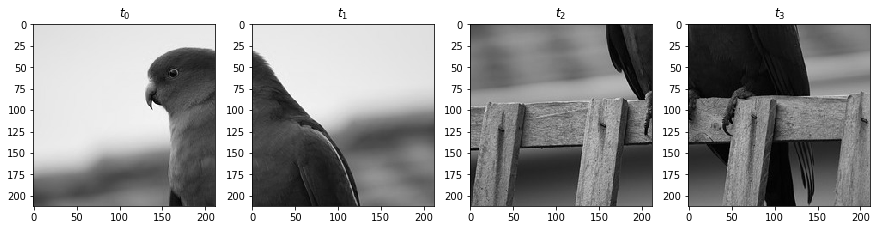

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(15, 12))

collator = CountingCollator(num_tiles=4, grayscale_probability=0.6)
x, tiles = collator([[torch_img.squeeze(0), -1]])

for i in range(tiles.shape[0]):
    ax[i].set_title(r'$t_{%d}$' % i)
    ax[i].imshow(tensor2PIL(tiles[i][0]))

plt.show()

## Context Encoder

Using downloaded and verified file: .data/VOCtrainval_11-May-2012.tar


Loading Segmentation Masks: 100%|██████████| 2913/2913 [00:37<00:00, 77.67it/s] 


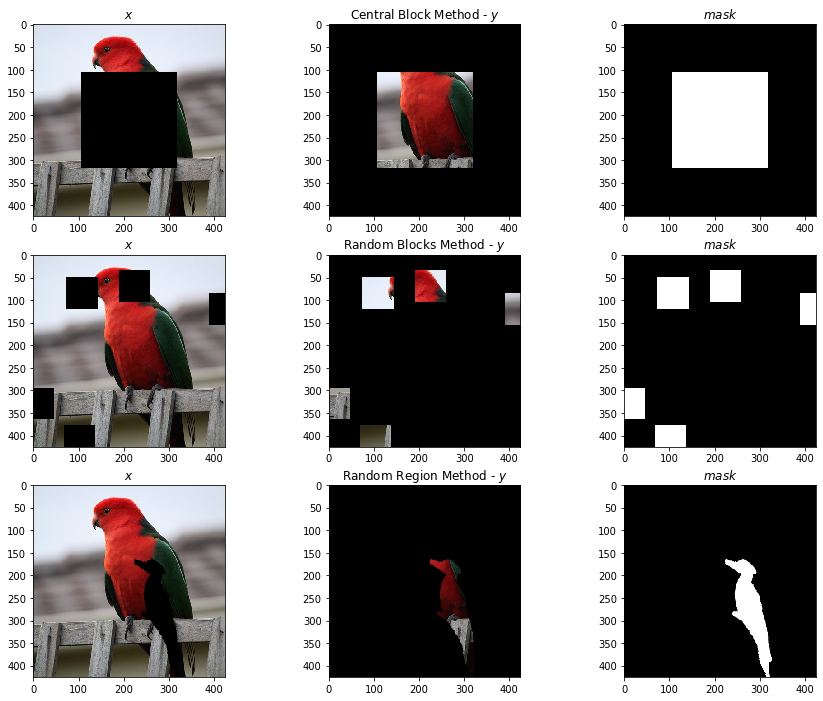

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
for i in range(3):
    for j in range(3):
        if j == 0:
            ax[i][j].set_title(r'$x$')
        elif j == 1:
            if i == 0:
                ax[i][j].set_title('Central Block Method - $y$')
            elif i == 1:
                ax[i][j].set_title('Random Blocks Method - $y$')
            else:
                ax[i][j].set_title('Random Region Method - $y$')   
        else:
            ax[i][j].set_title(r'$mask$')

# 1) Central Block
collator = ContextCollator(mask_method='central_block', fill_value=0.)
x, y, mask = collator([[torch_img.squeeze(0), -1]])
ax[0][0].imshow(tensor2PIL(x))
ax[0][1].imshow(tensor2PIL(y))
ax[0][2].imshow(tensor2PIL(mask))

# 2) Random Blocks
collator = ContextCollator(mask_method='random_blocks', fill_value=0.)
x, y, mask = collator([[torch_img.squeeze(0), -1]])
ax[1][0].imshow(tensor2PIL(x))
ax[1][1].imshow(tensor2PIL(y))
ax[1][2].imshow(tensor2PIL(mask))

# 3) Random Blocks
collator = ContextCollator(mask_method='random_region', fill_value=0.)
x, y, mask = collator([[torch_img.squeeze(0), -1]])
ax[2][0].imshow(tensor2PIL(x))
ax[2][1].imshow(tensor2PIL(y))
ax[2][2].imshow(tensor2PIL(mask))

plt.show()

## Jigsaw Puzzle

Generating Permutation Set: 100%|██████████| 1000/1000 [00:06<00:00, 157.24it/s]


Minimum hamming distance is chosen as 0.2222
Permutation Configuration:  (3, 2, 1, 0, 7, 8, 6, 5, 4)


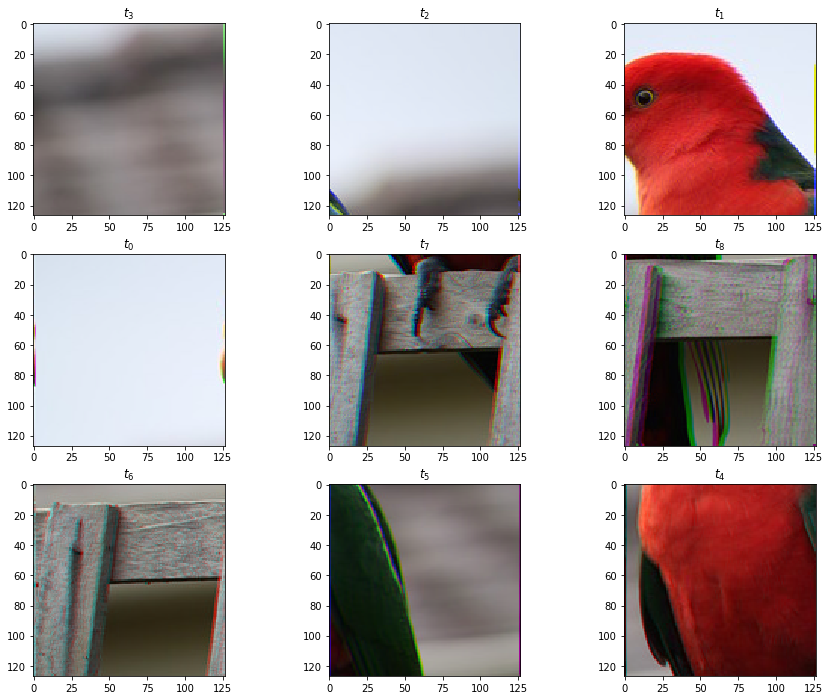

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))

collator = JigsawCollator(num_tiles=9, num_permutations=1000, permgen_method='average', 
                          grayscale_probability=0.3, buffer=True, jitter=True, normalization=False)
tiles, y = collator([[torch_img.squeeze(0), -1]])

print('Permutation Configuration: ', collator.permutations[y[0].item()])

for i in range(3):
    for j in range(3):
        ax[i][j].set_title(r'$t_{%d}$' % (collator.permutations[y[0].item()][i * 3 + j]))
        ax[i][j].imshow(tensor2PIL(tiles[i * 3 + j]))
        
plt.show()